In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import pandas as pd
import numpy as np
import sklearn as sk

In [4]:
dfcc = pd.read_csv("credit_card/clean_data.csv")
dfcc.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [5]:
dfcc.Gender.value_counts()

0    6323
1    3386
Name: Gender, dtype: int64

In [6]:
dfcc.groupby('Gender').mean()

,ID,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Target
Gender,,,,,,,,,,,,,,
0,5.075674e+06,0.24229,0.690811,0.199589,0.294006,0.086193,0.221572,0.392377,2.129053,27.372766,166644.609204,45.257156,5.795746,0.128420
1,5.076909e+06,0.60189,0.635558,0.250738,0.275842,0.090077,0.087123,0.479622,2.282634,27.078263,208461.511223,41.033303,5.420072,0.139102


In [7]:
dfcc.Target.value_counts()

0    8426
1    1283
Name: Target, dtype: int64

What we notice here is that the dataset is balanced. So we need to use SMOTE to oversample and balance the dataset. We should do this at the end before the test 
split

Columns to drop:  Work_phone, Phone, Email

In [8]:
dfcc = dfcc.drop(['Work_phone', 'Phone', 'Email'], axis=1)

In [9]:
for i in [4,5,7,14,19]:
    dfcc.Num_children = dfcc.Num_children.replace(i,3)

In [10]:
dfcc.Num_children.value_counts()

0    6819
1    1886
2     852
3     152
Name: Num_children, dtype: int64

In [11]:
for i in [5,6,7,9,15,20]:
    dfcc.Num_family = dfcc.Num_family.replace(i,4)

In [12]:
dfcc.Occupation_type.value_counts()

Other                    2994
Laborers                 1724
Sales staff               959
Core staff                877
Managers                  782
Drivers                   623
High skill tech staff     357
Accountants               300
Medicine staff            291
Cooking staff             193
Security staff            182
Cleaning staff            146
Private service staff      86
Low-skill Laborers         53
Secretaries                46
Waiters/barmen staff       40
HR staff                   22
IT staff                   18
Realty agents              16
Name: Occupation_type, dtype: int64

In [14]:
dfcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Unemployed       9709 non-null   int64  
 5   Num_children     9709 non-null   int64  
 6   Num_family       9709 non-null   int64  
 7   Account_length   9709 non-null   int64  
 8   Total_income     9709 non-null   float64
 9   Age              9709 non-null   float64
 10  Years_employed   9709 non-null   float64
 11  Income_type      9709 non-null   object 
 12  Education_type   9709 non-null   object 
 13  Family_status    9709 non-null   object 
 14  Housing_type     9709 non-null   object 
 15  Occupation_type  9709 non-null   object 
 16  Target           9709 non-null   int64  
dtypes: float64(3),

In [13]:
dfcc.columns

Index(['ID', 'Gender', 'Own_car', 'Own_property', 'Unemployed', 'Num_children',
       'Num_family', 'Account_length', 'Total_income', 'Age', 'Years_employed',
       'Income_type', 'Education_type', 'Family_status', 'Housing_type',
       'Occupation_type', 'Target'],
      dtype='object')

1. One-hot
2. Standard Scaler
3. SMOTE

In [15]:
dfcc_categ = dfcc.loc[:, ['Income_type', 'Education_type', 'Family_status', 'Housing_type', 'Occupation_type']]

In [16]:
dfcc_numerical = dfcc.loc[:, ['Gender', 'Own_car', 'Own_property', 'Unemployed', 'Num_children',
       'Num_family', 'Account_length', 'Total_income', 'Age', 'Years_employed']]

In [17]:
dfcc_numerical.head()

,Gender,Own_car,Own_property,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed
0,1,1,1,0,0,2,15,427500.0,32.868574,12.435574
1,1,1,1,0,0,2,29,112500.0,58.793815,3.104787
2,0,0,1,0,0,1,4,270000.0,52.321403,8.353354
3,0,0,1,1,0,1,20,283500.0,61.504343,0.000000
4,1,1,1,0,0,2,5,270000.0,46.193967,2.105450


In [18]:
dfcc_categ_one_hot = pd.get_dummies(dfcc_categ)
dfcc_categ_one_hot

,Income_type_Commercial associate,Income_type_Pensioner,Income_type_State servant,Income_type_Student,Income_type_Working,Education_type_Academic degree,Education_type_Higher education,Education_type_Incomplete higher,Education_type_Lower secondary,Education_type_Secondary / secondary special,...,Occupation_type_Low-skill Laborers,Occupation_type_Managers,Occupation_type_Medicine staff,Occupation_type_Other,Occupation_type_Private service staff,Occupation_type_Realty agents,Occupation_type_Sales staff,Occupation_type_Secretaries,Occupation_type_Security staff,Occupation_type_Waiters/barmen staff
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9705,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
9706,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
9707,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [19]:
dfcc_ready = pd.concat([dfcc_numerical, dfcc_categ_one_hot], axis=1)

In [20]:
dfcc_ready.to_csv('credit_card/ml_ready_credit_card.csv', index=False)

In [21]:
from sklearn.model_selection import train_test_split

X = dfcc_ready.values
y = dfcc.loc[:, ["Target"]].values.ravel()

In [22]:
from imblearn.over_sampling import SMOTE
seed = 100
k = 5

sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
X_smote, y_smote = sm.fit_resample(X, y)


In [23]:
# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=.25, random_state=22) # use stratify for classification models
print(f"{round(len(X_train)/len(X_smote), 3)} : {round(len(X_test)/len(X_smote), 3)}")

0.75 : 0.25


In [25]:
pd.DataFrame(y_smote).value_counts()

0    8426
1    8426
dtype: int64

In [27]:
len(X_smote)

16852

In [28]:
pd.DataFrame(y_train).value_counts()

0    6326
1    6313
dtype: int64

In [29]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train_smote)


# Scale the data
X_train_smote_scaled = X_scaler.transform(X_train_smote)
X_test_scaled = X_scaler.transform(X_test)


In [44]:
def evaluateModel(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train) # fit
    
    train_preds = model.predict(X_train) # predict
    test_preds = model.predict(X_test)
    test_proba = model.predict_proba(X_test)
    
    output_train = f"""
    METRICS FOR THE TRAINING SET:
    ----------------------------
    {confusion_matrix(y_train, train_preds)}

    {classification_report(y_train, train_preds)}
    """
    print(output_train)

    #################################################

    output_test = f"""
    METRICS FOR THE TESTING SET:
    ----------------------------
    {confusion_matrix(y_test, test_preds)}

    {classification_report(y_test, test_preds)}
    """
    print(output_test)
    print()
    
    #################################################
    
    fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, test_proba[:,1])

    roc_auc_knn = auc(fpr_knn, tpr_knn)
    print(f"AUC for the Model Test Set: {roc_auc_knn}")

    # make plot
    plt.figure(figsize=(10,6))
    plt.plot(fpr_knn, tpr_knn, color='darkorange')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    
    print("Brier Score:")
    print(sum((y_test - test_proba[:,1])**2))

In [31]:
# Data Science Libs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# model preprocessing & metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier



    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[3551 2775]
 [2894 3419]]

                  precision    recall  f1-score   support

           0       0.55      0.56      0.56      6326
           1       0.55      0.54      0.55      6313

    accuracy                           0.55     12639
   macro avg       0.55      0.55      0.55     12639
weighted avg       0.55      0.55      0.55     12639

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[1156  944]
 [1011 1102]]

                  precision    recall  f1-score   support

           0       0.53      0.55      0.54      2100
           1       0.54      0.52      0.53      2113

    accuracy                           0.54      4213
   macro avg       0.54      0.54      0.54      4213
weighted avg       0.54      0.54      0.54      4213

    

AUC for the Model Test Set: 0.5725943704504992


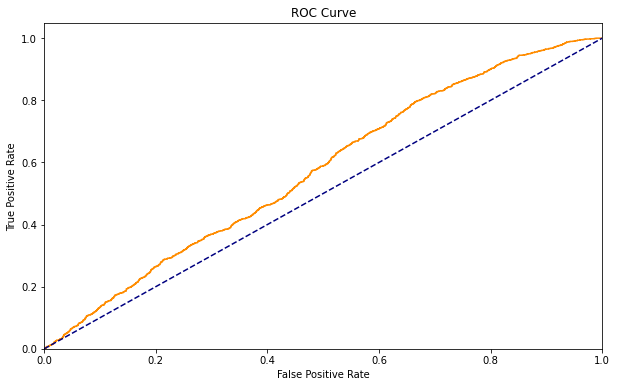

Brier Score:
1035.2742789261285


In [32]:
lr = LogisticRegression(max_iter=10000)
evaluateModel(lr, X_train, X_test, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[4420 1906]
 [ 740 5573]]

                  precision    recall  f1-score   support

           0       0.86      0.70      0.77      6326
           1       0.75      0.88      0.81      6313

    accuracy                           0.79     12639
   macro avg       0.80      0.79      0.79     12639
weighted avg       0.80      0.79      0.79     12639

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[1358  742]
 [ 359 1754]]

                  precision    recall  f1-score   support

           0       0.79      0.65      0.71      2100
           1       0.70      0.83      0.76      2113

    accuracy                           0.74      4213
   macro avg       0.75      0.74      0.74      4213
weighted avg       0.75      0.74      0.74      4213

    

AUC for the Model Test Set: 0.8213422576792193


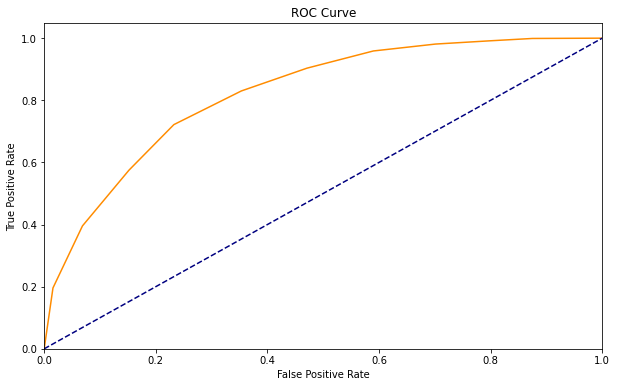

Brier Score:
758.5899999999945


In [33]:
knn_model = KNeighborsClassifier(n_neighbors=10)
evaluateModel(knn_model, X_train, X_test, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[6326    0]
 [   4 6309]]

                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      6326
           1       1.00      1.00      1.00      6313

    accuracy                           1.00     12639
   macro avg       1.00      1.00      1.00     12639
weighted avg       1.00      1.00      1.00     12639

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[2089   11]
 [ 335 1778]]

                  precision    recall  f1-score   support

           0       0.86      0.99      0.92      2100
           1       0.99      0.84      0.91      2113

    accuracy                           0.92      4213
   macro avg       0.93      0.92      0.92      4213
weighted avg       0.93      0.92      0.92      4213

    

AUC for the Model Test Set: 0.9383185721046583


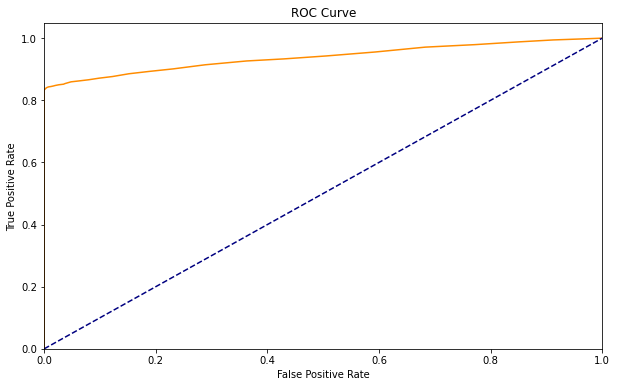

Brier Score:
306.5156000000021


In [34]:
rf = RandomForestClassifier(random_state=42, n_estimators=50)
evaluateModel(rf, X_train, X_test, y_train, y_test)

In [35]:
features = dfcc_ready.columns
pd.Series(list(zip(rf.feature_importances_, features))).sort_values(ascending=False).reset_index(drop=True)

0                   (0.07886088166678658, Own_property)
1                 (0.06793852572819109, Account_length)
2                            (0.06583982029391659, Age)
3            (0.06067779138889133, Income_type_Working)
4                        (0.05899198086693232, Own_car)
5                         (0.05533013580345089, Gender)
6                    (0.0520445986045672, Total_income)
7          (0.05173046460834751, Family_status_Married)
8                     (0.04917077398047666, Num_family)
9                 (0.04758307282578197, Years_employed)
10    (0.03961367854540879, Income_type_Commercial a...
11         (0.03824253780596783, Occupation_type_Other)
12    (0.03706122410542622, Education_type_Secondary...
13    (0.03599343448858743, Education_type_Higher ed...
14      (0.03393664621266514, Occupation_type_Laborers)
15                  (0.03073045127489137, Num_children)
16    (0.026690475305186038, Family_status_Single / ...
17    (0.01600102709487116, Housing_type_House /


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[6326    0]
 [ 890 5423]]

                  precision    recall  f1-score   support

           0       0.88      1.00      0.93      6326
           1       1.00      0.86      0.92      6313

    accuracy                           0.93     12639
   macro avg       0.94      0.93      0.93     12639
weighted avg       0.94      0.93      0.93     12639

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[2100    0]
 [ 353 1760]]

                  precision    recall  f1-score   support

           0       0.86      1.00      0.92      2100
           1       1.00      0.83      0.91      2113

    accuracy                           0.92      4213
   macro avg       0.93      0.92      0.92      4213
weighted avg       0.93      0.92      0.92      4213

    

AUC for the Model Test Set: 0.9390713947670881


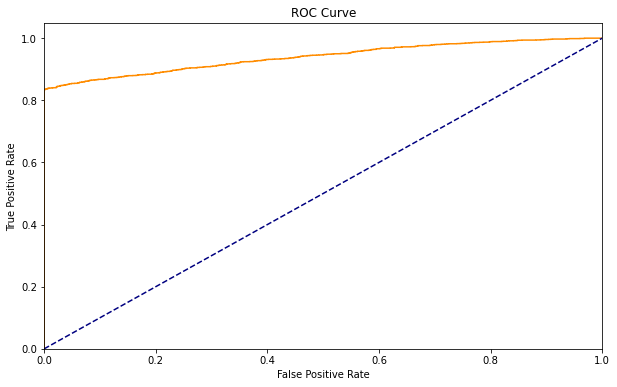

Brier Score:
297.7246367354914


In [39]:
lgb = LGBMClassifier(random_state=42)
evaluateModel(lgb, X_train, X_test, y_train, y_test)

In [37]:
import pickle

In [40]:
pickle.dump(lgb, open('lgb_cc_model.pkl', 'wb'))

In [41]:
pickled_model = pickle.load(open('lgb_cc_model.pkl', 'rb'))

In [45]:
pickled_model.predict(X_test)

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [46]:
pickled_model.predict_proba(X_test)

array([[0.00552125, 0.99447875],
       [0.03083527, 0.96916473],
       [0.93052575, 0.06947425],
       ...,
       [0.00215304, 0.99784696],
       [0.65101969, 0.34898031],
       [0.00235405, 0.99764595]])

In [47]:
X_test[0]

array([0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       1.54114853e+00, 3.31172280e+00, 1.15062176e+01, 1.48500000e+05,
       3.17934748e+01, 3.00187765e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.29425734e-01, 0.00000000e+00, 7.70574266e-01,
       0.00000000e+00, 7.70574266e-01, 0.00000000e+00, 2.29425734e-01,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.29425734e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.70574266e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [48]:
dfcc_ready.columns

Index(['Gender', 'Own_car', 'Own_property', 'Unemployed', 'Num_children',
       'Num_family', 'Account_length', 'Total_income', 'Age', 'Years_employed',
       'Income_type_Commercial associate', 'Income_type_Pensioner',
       'Income_type_State servant', 'Income_type_Student',
       'Income_type_Working', 'Education_type_Academic degree',
       'Education_type_Higher education', 'Education_type_Incomplete higher',
       'Education_type_Lower secondary',
       'Education_type_Secondary / secondary special',
       'Family_status_Civil marriage', 'Family_status_Married',
       'Family_status_Separated', 'Family_status_Single / not married',
       'Family_status_Widow', 'Housing_type_Co-op apartment',
       'Housing_type_House / apartment', 'Housing_type_Municipal apartment',
       'Housing_type_Office apartment', 'Housing_type_Rented apartment',
       'Housing_type_With parents', 'Occupation_type_Accountants',
       'Occupation_type_Cleaning staff', 'Occupation_type_Cooking 

In [112]:
dfcc2 = pd.read_csv("credit_card/clean_data.csv")
dfcc2.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [33]:
dfnew = dfcc.loc[:, ['Own_car', 'Own_property', 'Gender', 'Unemployed', 'Num_children', 'Num_family', 'Account_length', 'Total_income', 'Age', 'Years_employed', 'Target']]

In [34]:
dfnew.groupby('Target').mean()

,Own_car,Own_property,Gender,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed
Target,,,,,,,,,,
0,0.368977,0.676715,0.345953,0.178376,0.412889,2.159032,26.766675,180500.539817,43.982121,5.687858
1,0.359314,0.637568,0.367108,0.150429,0.441933,2.183944,30.575994,186007.008963,42.483559,5.512841


In [35]:
dfnew.groupby('Gender').mean()

,Own_car,Own_property,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Target
Gender,,,,,,,,,,
0,0.24229,0.690811,0.221572,0.386051,2.109284,27.372766,166644.609204,45.257156,5.795746,0.128420
1,0.60189,0.635558,0.087123,0.474011,2.261370,27.078263,208461.511223,41.033303,5.420072,0.139102
